<a href="https://colab.research.google.com/github/yamsunar089/YAMcn6005_portfolio/blob/main/week3tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this lab, I learned how to solve a classification problem using the Titanic dataset. I first explored the dataset to understand its structure and identify missing values. This helped me realise the importance of data inspection before applying any machine learning model.

During preprocessing, I selected important features such as passenger class, sex, age, and fare. I handled missing age values by filling them with the median and converted categorical data into numerical form using label encoding. I also scaled the features using standardisation, which is especially important for distance-based models like KNN.

I trained two models: K-Nearest Neighbours (KNN) and Logistic Regression. After testing both models, I compared their accuracy, confusion matrices, and classification reports. The results showed how each model performs differently and how scaling affects model performance.

Overall, this lab helped me understand the full machine learning workflow, from preprocessing to model comparison, and improved my confidence in building classification models.

In [ ]:
# Step 0: Install / import libraries (run once)
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import matplotlib.pyplot as plt


Load & Inspect dataset

In [ ]:
# Step 1: Load and inspect
file_path = "/content/titanic (1) (2).csv"  # change if needed
df = pd.read_csv(file_path)

print("Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nMissing values:\n", df.isnull().sum())
print("\nFirst 5 rows:\n", df.head())


Shape: (891, 8)

Columns: ['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'Ticket', 'Fare', 'Survived']

Missing values:
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age            177
Ticket           0
Fare             0
Survived         0
dtype: int64

First 5 rows:
    PassengerId  Pclass                                               Name  \
0            1       3                            Braund, Mr. Owen Harris   
1            2       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2            3       3                             Heikkinen, Miss. Laina   
3            4       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4            5       3                           Allen, Mr. William Henry   

      Sex   Age            Ticket     Fare  Survived  
0    male  22.0         A/5 21171   7.2500         0  
1  female  38.0          PC 17599  71.2833         1  
2  female  26.0  STON/O2. 3101282   7.9250         1  
3  female  35.

Basic preprocessing (select columns, fill missing ages, encode)

In [ ]:
# Step 2: Preprocessing
# We'll keep commonly used features: Pclass, Sex, Age, Fare, and the target Survived.
df_proc = df[["Survived", "Pclass", "Sex", "Age", "Fare"]].copy()

# Fill missing Age with median
age_median = df_proc["Age"].median()
df_proc["Age"].fillna(age_median, inplace=True)

# Encode Sex (female->0, male->1)
le = LabelEncoder()
df_proc["Sex"] = le.fit_transform(df_proc["Sex"])

# Check results
print("After preprocessing shape:", df_proc.shape)
print(df_proc.isnull().sum())
print(df_proc.head())


After preprocessing shape: (891, 5)
Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
dtype: int64
   Survived  Pclass  Sex   Age     Fare
0         0       3    1  22.0   7.2500
1         1       1    0  38.0  71.2833
2         1       3    0  26.0   7.9250
3         1       1    0  35.0  53.1000
4         0       3    1  35.0   8.0500


/tmp/ipython-input-1755188786.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_proc["Age"].fillna(age_median, inplace=True)


Split into features and target, then train/test split

In [ ]:
# Step 3: Features & target
X = df_proc.drop("Survived", axis=1)
y = df_proc["Survived"]

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)
print("Train class distribution:\n", y_train.value_counts(normalize=True))


Train shape: (712, 4)
Test shape: (179, 4)
Train class distribution:
 Survived
0    0.616573
1    0.383427
Name: proportion, dtype: float64


Feature scaling (standardization)

In [ ]:
# Step 4: Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Quick sanity check (mean ~0, std ~1 for train)
print("Train scaled mean (approx):", np.round(X_train_scaled.mean(axis=0), 3))
print("Train scaled std (approx):", np.round(X_train_scaled.std(axis=0), 3))


Train scaled mean (approx): [-0. -0.  0. -0.]
Train scaled std (approx): [1. 1. 1. 1.]


Train KNN classifier

In [ ]:
# Step 5: Train KNN (k=5)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Predict on test set
y_pred_knn = knn.predict(X_test_scaled)
acc_knn = accuracy_score(y_test, y_pred_knn)
print("KNN Accuracy:", round(acc_knn, 4))

# Confusion matrix for KNN
cm_knn = confusion_matrix(y_test, y_pred_knn)
print("\nKNN Confusion Matrix:\n", cm_knn)
print("\nKNN Classification Report:\n", classification_report(y_test, y_pred_knn))


KNN Accuracy: 0.8156

KNN Confusion Matrix:
 [[101   9]
 [ 24  45]]

KNN Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.92      0.86       110
           1       0.83      0.65      0.73        69

    accuracy                           0.82       179
   macro avg       0.82      0.79      0.80       179
weighted avg       0.82      0.82      0.81       179



Train Logistic Regression

In [ ]:
# Step 6: Train Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_scaled, y_train)

# Predict on test set
y_pred_log = logreg.predict(X_test_scaled)
acc_log = accuracy_score(y_test, y_pred_log)
print("Logistic Regression Accuracy:", round(acc_log, 4))

# Confusion matrix and report
cm_log = confusion_matrix(y_test, y_pred_log)
print("\nLogReg Confusion Matrix:\n", cm_log)
print("\nLogReg Classification Report:\n", classification_report(y_test, y_pred_log))


Logistic Regression Accuracy: 0.7877

LogReg Confusion Matrix:
 [[94 16]
 [22 47]]

LogReg Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.85      0.83       110
           1       0.75      0.68      0.71        69

    accuracy                           0.79       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.79      0.79      0.79       179



Accuracy comparison bar chart + confusion matrices (visual)

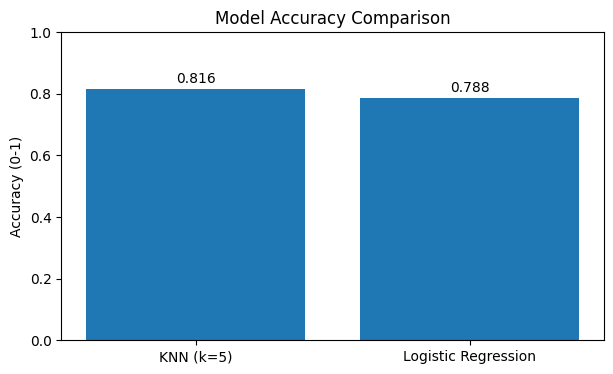

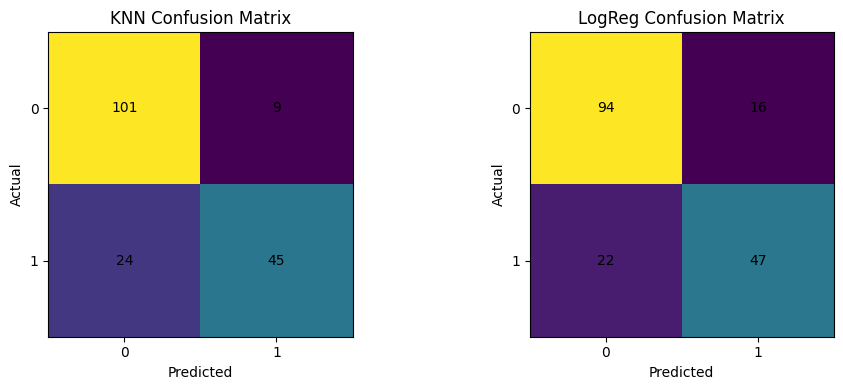

In [ ]:
# Step 7: Plot comparison bar chart and confusion matrices

models = ["KNN (k=5)", "Logistic Regression"]
accuracies = [acc_knn, acc_log]

# Bar chart for accuracy
plt.figure(figsize=(7,4))
plt.bar(models, accuracies)
plt.ylim(0,1)
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy (0-1)")
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.02, f"{v:.3f}", ha="center")
plt.show()

# Plot confusion matrices side-by-side
fig, axes = plt.subplots(1, 2, figsize=(10,4))
axes[0].imshow(cm_knn, interpolation='nearest')
axes[0].set_title("KNN Confusion Matrix")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")
axes[0].set_xticks([0,1]); axes[0].set_yticks([0,1])
for (i, j), val in np.ndenumerate(cm_knn):
    axes[0].text(j, i, val, ha='center', va='center')

axes[1].imshow(cm_log, interpolation='nearest')
axes[1].set_title("LogReg Confusion Matrix")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")
axes[1].set_xticks([0,1]); axes[1].set_yticks([0,1])
for (i, j), val in np.ndenumerate(cm_log):
    axes[1].text(j, i, val, ha='center', va='center')

plt.tight_layout()
plt.show()
